# FoLT Tutorial 2 Summary (Preprocessing):
### Part1: Regular Expressions
**Functions:**
1. `re.findall(pattern, word)`: This functions returns a list of all occurences of pattern in word
- Some rules:
    + $ stands for the end of the word
    + ^ stands for the ending of the words
    + [xyz] means either x, y, or z (works also for numbers, see example 2)
    + expr{x} means the expression has to be repeated twice (see example 2) 
- Examples:

In [1]:
import re
word = 'hello again 12345 123 hello there'
print(re.findall('ere$', word))
print(re.findall('[0-7]{2}', word))
print(re.findall('^[ghi][def][jlk][mno]$', word))
print(re.findall('[tuv][ghi][def][pqrs][def]$', word))

['ere']
['12', '34', '12']
[]
['there']


2. `re.split(pattern, word)`: This expression splits word using the pattern and returns the result as a list of strings
- Some Rules:
    + If the pattern isn't found, split returns a list of the original string
    + If you use parantheses in the pattern, the pattern is also returned in the list
- Examples:

In [2]:
import re
text = "Hello-World-Hello-Universe"
pattern1 = "-"
pattern2 = "(-)"
split_text = re.split(pattern1, text)
print(split_text)
split_text = re.split(pattern2, text)
print(split_text)

['Hello', 'World', 'Hello', 'Universe']
['Hello', '-', 'World', '-', 'Hello', '-', 'Universe']


3. `re.compile(word)` compiles a regex pattern into an object, enabling efficient reuse for matching operations in text.
- Some Rules:
    + It returns an RE object which we can use to perform patter matching
    + The compiled object can be reused multiple times without recompiling the pattern
    + You can use some flags like `re.IGNORECASE` (see example)
- Examples:

In [3]:
import re

pattern = re.compile('hello', re.IGNORECASE)

matches = pattern.findall('Hello World, hello universe')

print(matches)  # Output: ['Hello', 'hello']

['Hello', 'hello']


##### USEFUL IMPORTS FOR PART 2, MUST EXECUTE

In [4]:
import nltk
from nltk.book import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### PART 2: NLTK 
- Basic preprocessing with NLTK
    + Two Important datasets:
        1. **stopwords**: common words in various langauges that we usually filter out, in english for example: "the", "is", "in", "for, "where", etc.
        2. **wordnet**: a large lexaical database of english words, which are linked together by their semantic relationships, like synonyms, antonyms, definitions...
    + Example of usage:

In [5]:
# download stopwords and wordnet
nltk.download('stopwords')
nltk.download('wordnet')

# define text to preprocess
text = "This is an example sentence to demonstrate text preprocessing with NLTK. We will tokenize, remove stopwords, and stem the words."

# tokenize text
tokens = word_tokenize(text)

# remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# stem words
ps = PorterStemmer()
stemmed_tokens = [ps.stem(token) for token in filtered_tokens]

# lemmatize words
wnl = WordNetLemmatizer()
lemmatized_tokens = [wnl.lemmatize(token) for token in filtered_tokens]

print("Original text:", text)
print("Tokenized text:", tokens)
print("Filtered text (stopwords removed):", filtered_tokens)
print("Stemmed text:", stemmed_tokens)
print("Lemmatized text:", lemmatized_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yassine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yassine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original text: This is an example sentence to demonstrate text preprocessing with NLTK. We will tokenize, remove stopwords, and stem the words.
Tokenized text: ['This', 'is', 'an', 'example', 'sentence', 'to', 'demonstrate', 'text', 'preprocessing', 'with', 'NLTK', '.', 'We', 'will', 'tokenize', ',', 'remove', 'stopwords', ',', 'and', 'stem', 'the', 'words', '.']
Filtered text (stopwords removed): ['example', 'sentence', 'demonstrate', 'text', 'preprocessing', 'NLTK', '.', 'tokenize', ',', 'remove', 'stopwords', ',', 'stem', 'words', '.']
Stemmed text: ['exampl', 'sentenc', 'demonstr', 'text', 'preprocess', 'nltk', '.', 'token', ',', 'remov', 'stopword', ',', 'stem', 'word', '.']
Lemmatized text: ['example', 'sentence', 'demonstrate', 'text', 'preprocessing', 'NLTK', '.', 'tokenize', ',', 'remove', 'stopwords', ',', 'stem', 'word', '.']


- Sentence Segmentation using NLTK:
    + We are gonna use **punkt** dataset, this is well-suited for dividing plain text into sentences
    + Example of sentence segmentation:

In [7]:
import nltk
nltk.download('punkt')

text = "This is a sentence. This is another sentence. This is a third sentence."
sentences = nltk.sent_tokenize(text)
print(sentences)

['This is a sentence.', 'This is another sentence.', 'This is a third sentence.']


[nltk_data] Downloading package punkt to /home/yassine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Now we are gonna use the brown corpus (it is made of a collection of text samples with over a million word) to write a function called `word_freq(word, category)` that takes a token and a category, it calculates the frequency of that word in a distinct category of the brown corpus
    + Some info about the function: The `nltk.FreqDist()` function in the Natural Language Toolkit (NLTK) library in Python is used to create a frequency distribution of words, i.e., it counts the frequency of each vocabulary item in the text. 
    + Example:

In [8]:
import nltk
from nltk.corpus import brown

def word_freq(word, category):

    text = brown.words(categories=category)
    fdist = nltk.FreqDist(text)
    return fdist[word]

print(word_freq('good', 'news')) 
print(word_freq('good', 'hobbies')) 
print(word_freq('good', 'belles_lettres')) 

50
96
104


- We used `nltk.FreqDist()` to calculate the frequency distribution of words in a text, now we are gonna use a similar function that calcuate the distribution conditionally: `nltk.ConditionalFreqDist()`, in the next example we are gonna make function that uses pair of `(gender, name)` as its condition then draw a graph to display the results

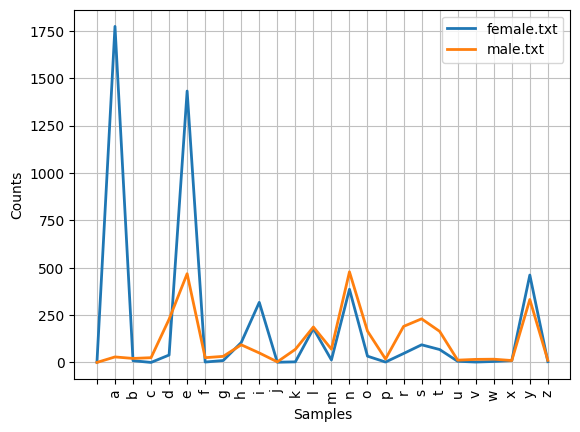

<Axes: xlabel='Samples', ylabel='Counts'>

In [9]:
import nltk
# Download corpus if you haven't already
# nltk.download('names')
from nltk.corpus import names
# Your code here
cfd = nltk.ConditionalFreqDist(
    (gender, name[-1])
        for gender in names.fileids()
        for name in names.words(gender)
    )

cfd.plot()

### PART 3: spaCy
- The advantage of the spaCy library is that it has a wide variety of languages.
- When using spaCy we have to specify which language we want to work with, as it doesn't assume it 
- Now we are gonna make a pipeline called an NLP pipeline which tokenize, tag, parse and name entity recognize. Execute the following code to understand wht actually happens:

In [ ]:
from spacy.lang.en import English
nlp = English()

raw = "Hard to judge whether these sides were good. We were grossed " \
      "out by the melted styrofoam and didn't want to eat it for fear of getting sick."

doc = nlp(raw)

print(doc) #After the pipeline is complete, doc contains the processed text.

for token in doc: #Iterate over the tokens in the doc
    print(token.text)

- Now to try other languages other than englis, we are gonna use german spacy library (we are gonna do the same thing with the pipeline, just different language)
- We can either import `spacy.lang.de` or load the german model using `spacy.load("de_core_news_sm")`
- Code below:

In [ ]:
import spacy
#!python -m spacy download de_core_news_sm

german_raw = "Schwer zu beurteilen, ob diese Seiten gut waren. Wir haben uns " \
            "vor dem geschmolzenen Styropor geekelt und wollten es nicht essen, aus Angst, krank zu werden."

nlp_de = spacy.load("de_core_news_sm")

# Your code here
doc_de = nlp_de(german_raw)

print(doc_de)

for token in doc_de:
    print(token.text)

- Doc for indexing, spacy has the same indexing as base python, see example(we created doc earlier before, we are just gonna reuse it)

In [ ]:
last_word = doc[-1]
first_word = doc[0]
print(first_word, last_word)

- Spacy can detect the lexical attribute of a token (this already happened in the pipelining), now we are gonna test that using `is_digit` and `is_punct`

In [ ]:
print(first_word.is_digit) #Hard
print(last_word.is_punct) # .

- Sentence Segmentation using spaCy, we are gonna use the `sents` attributes of the `Doc` object to obtain the list of sentences, the list is of type generator so we have to iterate through it.

In [2]:
from spacy.lang.en import English
from spacy.pipeline import Sentencizer

nlp = English()
nlp.add_pipe('sentencizer')  # Add sentencizer to the pipeline

text = "This is the first sentence. This is the second sentence. And this is the third sentence."
doc = nlp(text)

for sent in doc.sents:
    print(sent.text)

This is the first sentence.
This is the second sentence.
And this is the third sentence.
